<a href="https://colab.research.google.com/github/mtermor/NTIC_DeepLearning/blob/main/CNN/Introduction_to_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='Image Filtering'></a>
# Image Filtering

In [1]:
## if you have a GPU
GPU=True
#%tensorflow_version 2.x
import tensorflow as tf
if GPU:
    device_name = tf.test.gpu_device_name()
    if device_name != '/device:GPU:0':
        raise SystemError('GPU device not found')
    print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
tf.random.set_seed(0)

Load the example image.

Load the example image.

You can download the image with an image url using [get_file](https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file)
```python
tf.keras.utils.get_file(
    fname, origin, untar=False, md5_hash=None, file_hash=None,
    cache_subdir='datasets', hash_algorithm='auto',
    extract=False, archive_format='auto', cache_dir=None
)
```

In [3]:
img_folder= '../../images'
#url = "https://github.com/ezponda/intro_deep_learning/blob/main/images/taj-mahal.png"
url = 'https://i.ibb.co/vd1SqSM/The-grandeur-of-the-Taj-Mahal-and-its-intricate-stone-inlays-immediately-greets-the-visitor-upon-ent.jpg'
image_path = tf.keras.utils.get_file("taj-mahal-2.jpg", url)
#pic = 'taj-mahal.jpg'
#image_path = os.path.join(img_folder, pic)

138206/138206 [==============================] - 1s 4us/step


In [4]:
def read_image(image_path, target_size=None):
    image = tf.keras.preprocessing.image.load_img(image_path,
                target_size=target_size)
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = image.astype(np.uint8)
    return image

image = read_image(image_path)

We can see that the dimensions of the image are (468, 468, 3).

That is, the image has a resolution of **468x468 pixels**, with **3 color channels (Red, Green and Blue)**.

In [5]:
image.shape

(468, 468, 3)

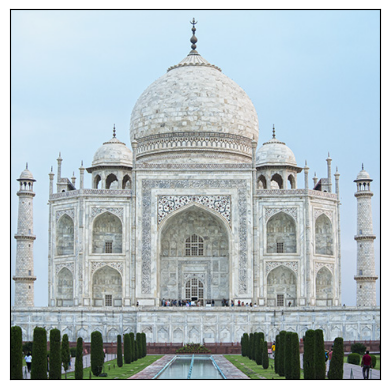

In [6]:
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

### Convolution examples

The following kernel performs the identity operation. The result of the convolution returns the original image.

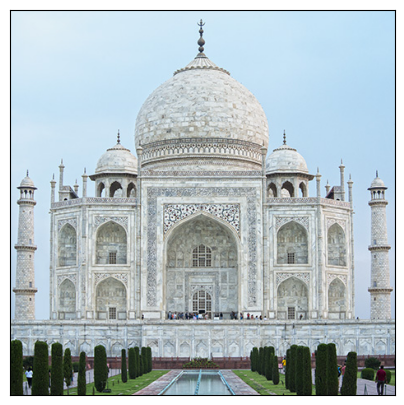

In [7]:
identity_kernel = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])

img = cv2.filter2D(image, -1, identity_kernel)

fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(img);

The following filter applies the [Box Blur] (https://en.wikipedia.org/wiki/Box_blur), where each pixel of the resulting image has a value equal to the mean of its pixel values neighbors.

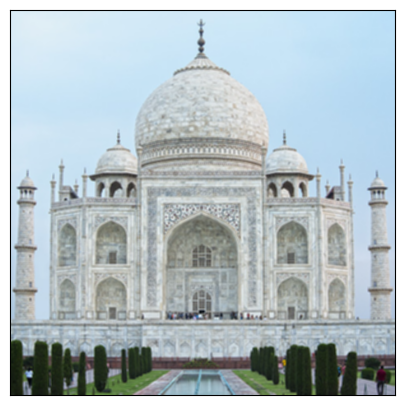

In [8]:
box_blur_filter = (1/9) * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

img = cv2.filter2D(image, -1, box_blur_filter)

fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(img);

The following example shows a filter widely used in digital image processing: the [Gaussian filtering] (https://en.wikipedia.org/wiki/Gaussian_blur).

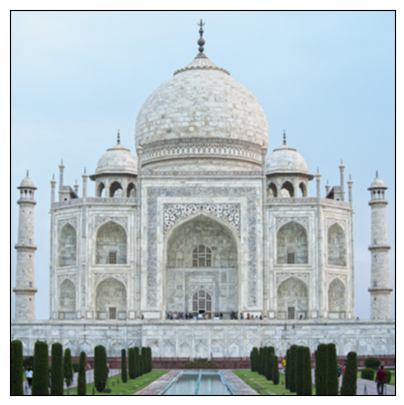

In [9]:
gaussian_blur_filter = (1/16) * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

img = cv2.filter2D(image, -1, gaussian_blur_filter)

fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xticks([])
ax.set_yticks([])

plt.imshow(img);

We can gaussian noise to the image and see the effects

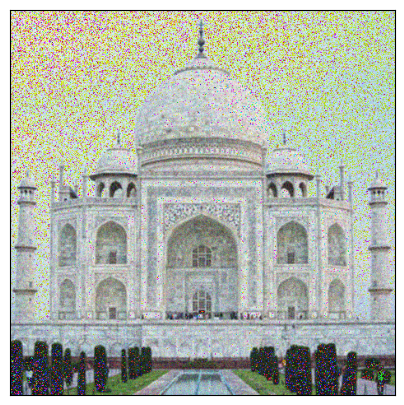

In [10]:
sigma = 20
n, m, k = image.shape
img_noise = img + sigma*np.random.randn(n, m, k)
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xticks([])
ax.set_yticks([])

plt.imshow(img_noise.astype(np.uint8));

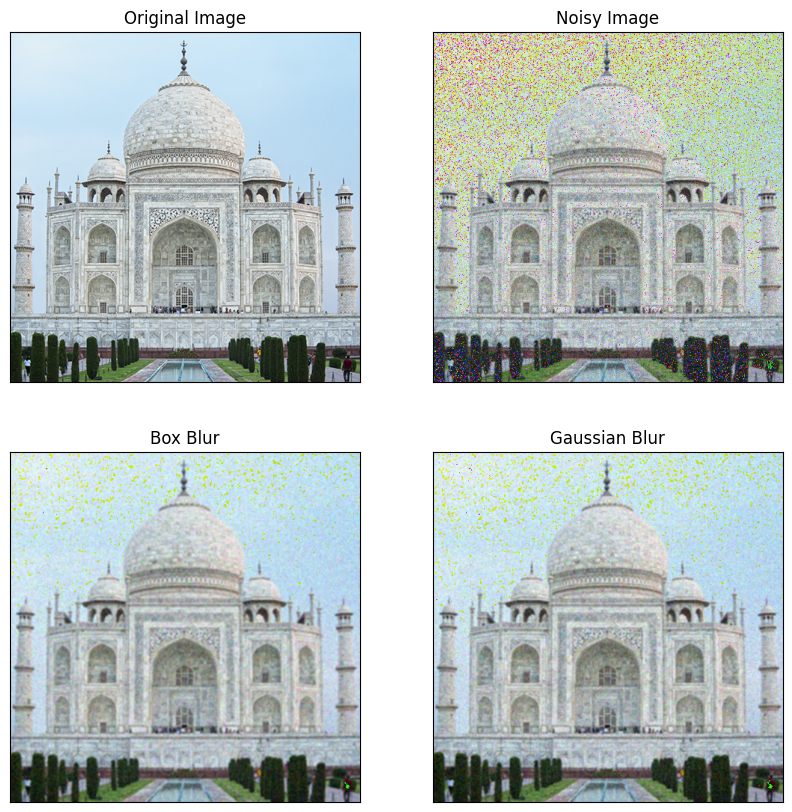

In [11]:
img1 = cv2.filter2D(img_noise, -1, gaussian_blur_filter)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

ax[0, 0].set_title('Original Image')
ax[0, 0].imshow(image.astype(np.uint8));

ax[0, 1].set_title('Noisy Image')
ax[0, 1].imshow(img_noise.astype(np.uint8));

ax[1, 0].set_title('Box Blur')
ax[1, 0].imshow(cv2.filter2D(img_noise, -1, box_blur_filter).astype(np.uint8));

ax[1, 1].set_title('Gaussian Blur')
ax[1, 1].imshow(cv2.filter2D(img_noise, -1, gaussian_blur_filter).astype(np.uint8));

The following filter is used for edge detection in images.

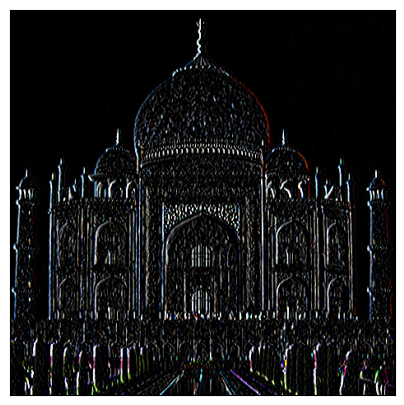

In [12]:
edge_detection_filter = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

img = cv2.filter2D(image, -1, edge_detection_filter)

fig, ax = plt.subplots(1, figsize=(5, 5))
plt.xticks([])
plt.yticks([])

plt.imshow(img);

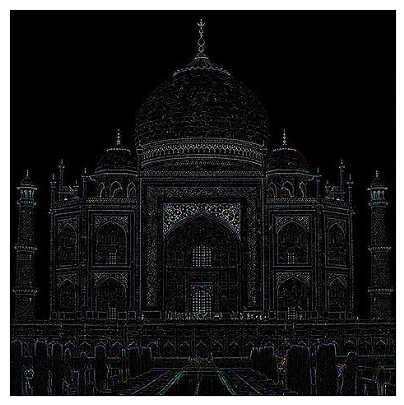

In [13]:
edge_detection_filter = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

img = cv2.filter2D(image, -1, edge_detection_filter)

fig, ax = plt.subplots(1, figsize=(5, 5))
plt.xticks([])
plt.yticks([])

plt.imshow(img);

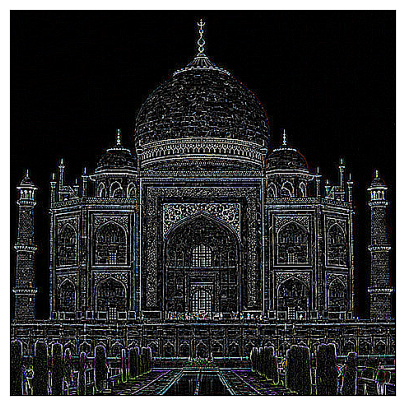

In [14]:
edge_detection_filter = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]
])

img = cv2.filter2D(image, -1, edge_detection_filter)

fig, ax = plt.subplots(1, figsize=(5, 5))
plt.xticks([])
plt.yticks([])

plt.imshow(img);

The following filter allows you to highlight the edges of the image by increasing its contrast. The filter is the result of subtracting the matrix of an edge detection filter from the matrix of an identity filter:

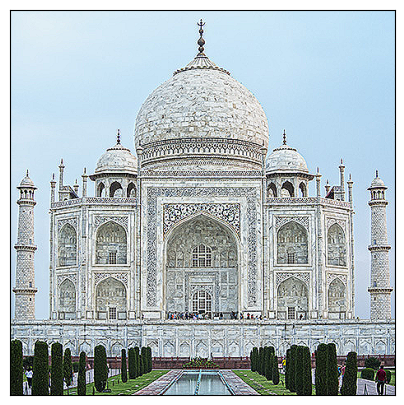

In [15]:
sharpen_flter = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

img = cv2.filter2D(image, -1, sharpen_flter)

fig, ax = plt.subplots(1, figsize=(5, 5))
plt.xticks([])
plt.yticks([])
plt.imshow(img);

OpenCV provides a multitude of techniques for digital image processing. Other examples of filters that we can apply to images are, for example, those that allow us to perform [morphological transformations](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html).

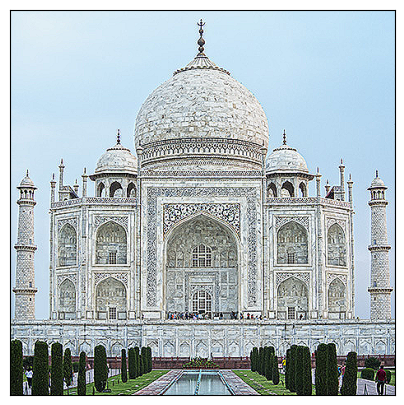

In [16]:
kernel = np.ones((1, 1), np.uint8)
dilation = cv2.dilate(img, kernel, iterations=1)


fig, ax = plt.subplots(1, figsize=(5, 5))
plt.xticks([])
plt.yticks([])
plt.imshow(dilation)

<a id='image_classification_cnn'></a>
# Image Classification CNN

In this section we will study the problem of classifying images with convolutional neural networks (CNN). To do this, we will rely on the [TensorFlow tutorial](https://www.tensorflow.org/tutorials/images/classification).

We will start with the download of the dataset. We will work with a set of **~ 3700 photographs** of flowers from **5 different classes**.

In [17]:
import pathlib
import tensorflow as tf
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 11s 0us/step


We check that we have all the photographs.

In [18]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [19]:
os.listdir(data_dir)

['dandelion', 'roses', 'LICENSE.txt', 'sunflowers', 'tulips', 'daisy']

Visualize some of them

In [20]:
roses = list(data_dir.glob('roses/*')) # Select rose randomly
sunflowers = list(data_dir.glob('sunflowers/*'))

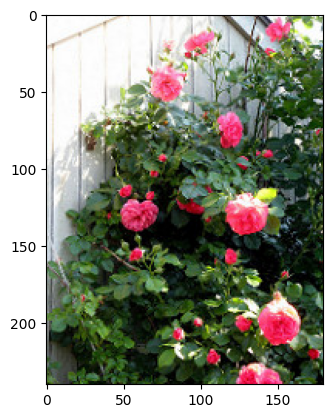

In [21]:
im = read_image(str(roses[np.random.randint(0, len(roses))]))
plt.imshow(im);

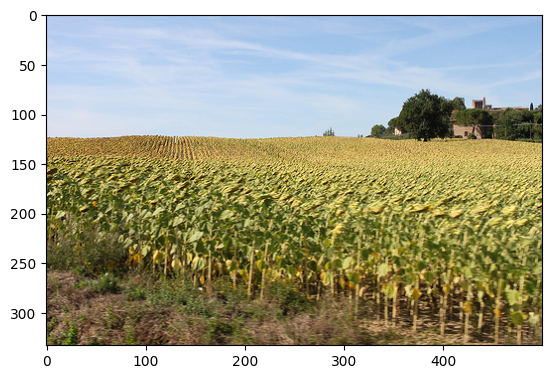

In [22]:
im = read_image(str(sunflowers[np.random.randint(0, len(sunflowers))]))
plt.imshow(im);

We create a TensorFlow dataset with the data that we have previously loaded to disk with the [`image_dataset_from_directory ()`](https://keras.io/api/preprocessing/image/#image_dataset_from_directory-function)
method.

The `colos_mode` parameter (by default 'rgb') allows you to choose the color scale to use. To automatically load and convert the images to grayscale it must be set as `color_mode = grayscale`.

In [23]:
image_size = (96,96) #pixels
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,  # 80%  train, 20% validation
  subset='training',  # 'training' o 'validation', only  with 'validation_split'
  seed=1,
  image_size=image_size,  # Dimension (img_height, img_width) for rescaling
  batch_size=64
)

# Recorre las carpetas con el nombre de los tipos de flores y va guardando en batches

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [24]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset='validation',
  seed=1,
  image_size=image_size,
  batch_size=64)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [25]:
class_names_list = train_ds.class_names
class_names_list

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

### Configure the dataset for performance

Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

Interested readers can learn more about both methods, as well as how to cache data to disk in the [data performance guide](https://www.tensorflow.org/guide/data_performance#prefetching).

In [26]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Guardar imáegnes en memoria RAM para no tener que estar guardándolas constantemente

Visualizing some training samples.

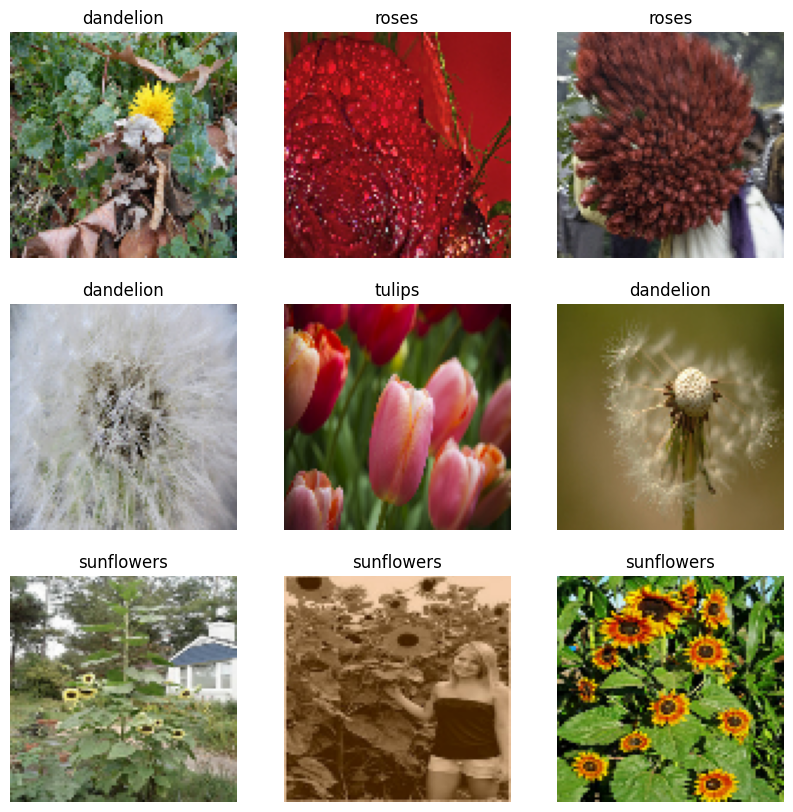

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names_list[labels[i]])
        plt.axis("off")

We build the model. The **input will have a dimension of (n, n, 3)**, corresponding to (image height, image width, number of color channels).

At the input of the network we include a preprocessing that will allow the images to be rescaled by normalizing the pixel values to a range between 0 and 1.